In [9]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

### Реализация метода градиентного спуска для одной и нескольких переменных

#### Список параметров:
- param f: sympy-выражение функции
- param vars: список переменных (sympy)
- param start: начальная точка (список чисел)
- param learning_rate: шаг обучения
- param epsilon: критерий остановки
- param max_iters: максимальное количество итераций
- return: история значений точек

In [10]:
def gradient_descent(f, vars, start, learning_rate=0.1, epsilon=1e-8, max_iters=1000):

    grad_f = [sp.diff(f, var) for var in vars]  # градиент функции 
    grad_f_func = sp.lambdify(vars, grad_f, 'numpy') 
    f_func = sp.lambdify(vars, f, 'numpy')  

    x = np.array(start, dtype=np.float64)  # начальная точка
    history = [(*x, f_func(*x))] 

    for _ in range(max_iters):
        grad = np.array(grad_f_func(*x), dtype=np.float64)  
        x_new = x - learning_rate * grad  

        history.append((*x_new, f_func(*x_new))) 
        if np.linalg.norm(x_new - x) < epsilon:  # проверка
            break
        x = x_new

    return np.array(history)

#### Пример 1: Функция одной переменной 

In [11]:
x = sp.Symbol('x')
f1 = sp.exp(x) - 4*x 
history1 = gradient_descent(f1, [x], [5]) 

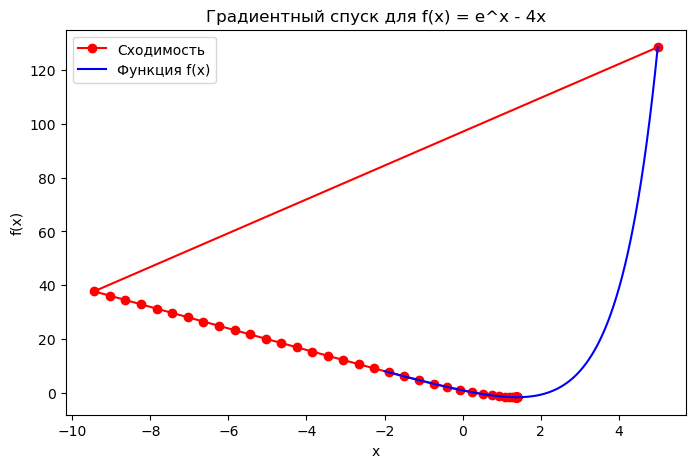

In [12]:
# визуализация
plt.figure(figsize=(8, 5))
plt.plot(history1[:, 0], history1[:, 1], 'ro-', label="Сходимость")
x_vals = np.linspace(-2, 5, 200)
plt.plot(x_vals, [f1.subs(x, val) for val in x_vals], 'b-', label="Функция f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.title("Градиентный спуск для f(x) = e^x - 4x")
plt.show()

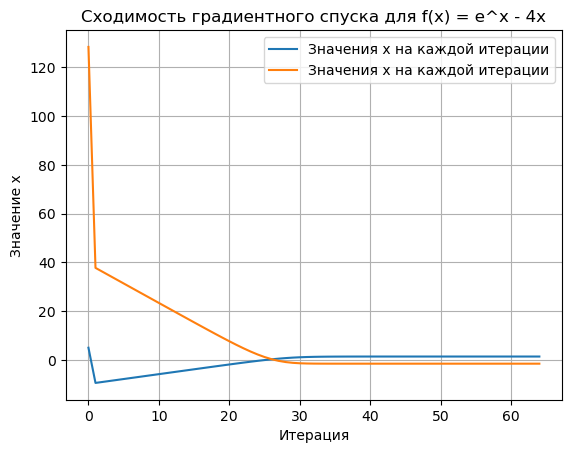

In [15]:
# визуализация сходимости
plt.plot(history1, label='Значения x на каждой итерации')
plt.xlabel('Итерация')
plt.ylabel('Значение x')
plt.title('Сходимость градиентного спуска для f(x) = e^x - 4x')
plt.legend()
plt.grid()
plt.show()

#### Пример 2: Функция двух переменных

In [13]:
x, y = sp.symbols('x y')
f2 = x**2 + 10*y**2 
history2 = gradient_descent(f2, [x, y], [2, 3])  

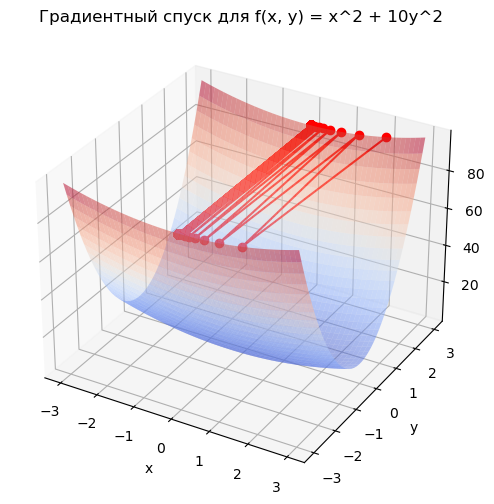

In [14]:
# визуализация
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(history2[:, 0], history2[:, 1], history2[:, 2], 'ro-', label="Сходимость")
X, Y = np.meshgrid(np.linspace(-3, 3, 50), np.linspace(-3, 3, 50))
Z = np.array([[f2.subs({x: X[i, j], y: Y[i, j]}) for j in range(50)] for i in range(50)], dtype=np.float64)
ax.plot_surface(X, Y, Z, alpha=0.5, cmap='coolwarm')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
plt.title("Градиентный спуск для f(x, y) = x^2 + 10y^2")
plt.show()

### Реализация метода наискорейшего спуска (с ограничением на λ)

#### Список параметров:
- param f: sympy-выражение функции
- param vars: список переменных (sympy)
- param start: начальная точка (список чисел)
- param lambda_max: максимальный шаг обучения λ
- param epsilon: критерий остановки
- param max_iters: максимальное количество итераций
- return: история значений точек

In [17]:
def steepest_descent(f, vars, start, epsilon=1e-8, max_iters=1000, lambda_max=1):

    grad_f = [sp.diff(f, var) for var in vars]  # градиент функции 
    grad_f_func = sp.lambdify(vars, grad_f, 'numpy')  
    f_func = sp.lambdify(vars, f, 'numpy') 

    x = np.array(start, dtype=np.float64)  # начальная точка
    history = [(*x, f_func(*x))] 

    for _ in range(max_iters):
        grad = np.array(grad_f_func(*x), dtype=np.float64)  
        
        if np.linalg.norm(grad) < epsilon: 
            break

        # функция одномерной оптимизации по λ: f(x - λ * ∇f)
        lambda_func = lambda lam: f_func(*(x - lam * grad))

        # ищем λ в диапазоне (0, lambda_max)
        res = minimize_scalar(lambda_func, bounds=(0, lambda_max), method='bounded')
        optimal_lambda = res.x  

        x_new = x - optimal_lambda * grad 

        history.append((*x_new, f_func(*x_new)))  
        if np.linalg.norm(x_new - x) < epsilon:  # критерий остановки
            break
        x = x_new

    return np.array(history)

#### Пример 1: Функция одной переменной 

In [18]:
x = sp.Symbol('x')
f1 = sp.exp(x) - 4*x 
history1 = steepest_descent(f1, [x], [5])  

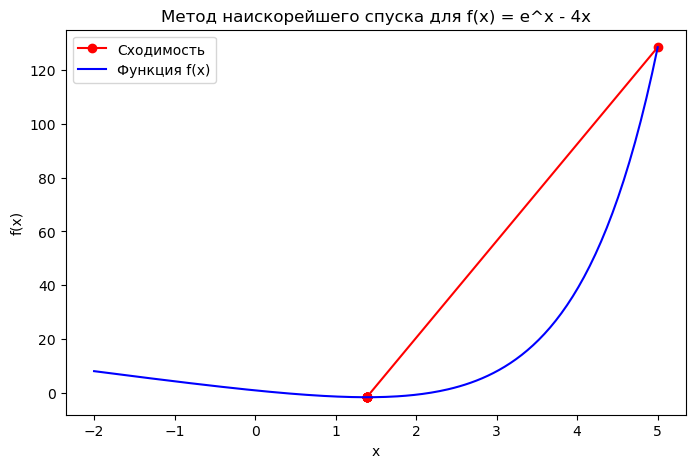

In [19]:
# визуализация 
plt.figure(figsize=(8, 5))
plt.plot(history1[:, 0], history1[:, 1], 'ro-', label="Сходимость")
x_vals = np.linspace(-2, 5, 200)
plt.plot(x_vals, [f1.subs(x, val) for val in x_vals], 'b-', label="Функция f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.title("Метод наискорейшего спуска для f(x) = e^x - 4x")
plt.show()

#### Пример 2: Функция двух переменных

In [20]:
x, y = sp.symbols('x y')
f2 = x**2 + 10*y**2 
history2 = steepest_descent(f2, [x, y], [2, 3], lambda_max=0.1)  

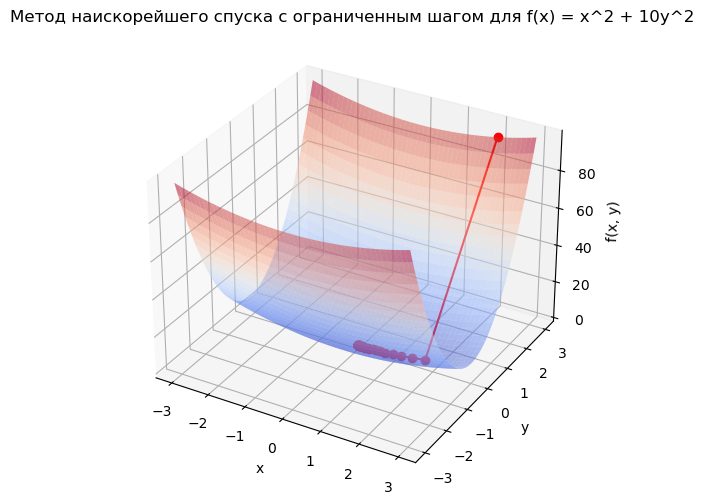

In [21]:
# визуализация 
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(history2[:, 0], history2[:, 1], history2[:, 2], 'ro-', label="Сходимость")
X, Y = np.meshgrid(np.linspace(-3, 3, 50), np.linspace(-3, 3, 50))
Z = np.array([[f2.subs({x: X[i, j], y: Y[i, j]}) for j in range(50)] for i in range(50)], dtype=np.float64)
ax.plot_surface(X, Y, Z, alpha=0.5, cmap='coolwarm')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
plt.title("Метод наискорейшего спуска с ограниченным шагом для f(x) = x^2 + 10y^2")
plt.show()